# La librairie Pandas et ses DataFrames ! 

Nous revenons à notre ensemble de données sur la piste cyclable ici. Je suis curieux de savoir si Montreal est une ville de velo banlieue ou une ville de cyclisme ludique - les gens font-ils plus de vélo les week-ends ou les jours de semaine?

In [1]:
# Rends nos tracés inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Enjolive les graphes
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

In [13]:
df_repare=pd.read_csv('data/comptagevelo2017.csv',sep=',',encoding='utf-8',parse_dates=['Date'],dayfirst=True,index_col=['Date']) 
df_repare [: 5 ]

,Unnamed: 1,Berri1,Boyer,Boyer 2,Brébeuf,Christophe-Colomb,CSC (Côte Sainte-Catherine),Eco-Totem - Métro Laurier,Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Pont Jacques-Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent/Bellechasse,Saint-Urbain
Date,,,,,,,,,,,,,,,,,,,,
2017-01-01,00:00,38,35,NaN,20,NaN,60,58,38,12,10,13,9,0.0,42,77,15,8,72,5
2017-01-02,00:00,109,40,0.0,43,NaN,61,66,152,57,9,52,14,0.0,136,231,22,10,182,4
2017-01-03,00:00,141,24,24.0,9,NaN,14,131,216,74,32,71,17,0.0,99,242,53,28,532,5
2017-01-04,00:00,233,64,95.0,7,NaN,12,160,284,80,45,64,5,15.0,128,296,131,33,821,0
2017-01-05,00:00,265,93,94.0,11,NaN,14,160,306,97,38,97,6,0.0,189,338,89,45,786,9


### Ajouter une colonne 'jour de la semaine' à notre dataframe 

Premièrement, nous devons charger les données, avec time index, ... Nous l'avons déjà fait auparavant (cf notebook précédent).
Ensuite, nous allons simplement regarder la piste cyclable Berri.

In [3]:
df_repare=pd.read_csv('data/comptagevelo2017.csv',sep=',',encoding='utf-8',parse_dates=['Date'],dayfirst=True,index_col=['Date']) 
df_repare [: 15 ]

,Unnamed: 1,Berri1,Boyer,Boyer 2,Brébeuf,Christophe-Colomb,CSC (Côte Sainte-Catherine),Eco-Totem - Métro Laurier,Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Pont Jacques-Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent/Bellechasse,Saint-Urbain
Date,,,,,,,,,,,,,,,,,,,,
2017-01-01,00:00,38,35,NaN,20,NaN,60,58,38,12,10,13,9,0.0,42,77,15,8,72,5
2017-01-02,00:00,109,40,0.0,43,NaN,61,66,152,57,9,52,14,0.0,136,231,22,10,182,4
2017-01-03,00:00,141,24,24.0,9,NaN,14,131,216,74,32,71,17,0.0,99,242,53,28,532,5
2017-01-04,00:00,233,64,95.0,7,NaN,12,160,284,80,45,64,5,15.0,128,296,131,33,821,0
2017-01-05,00:00,265,93,94.0,11,NaN,14,160,306,97,38,97,6,0.0,189,338,89,45,786,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,00:00,116,95,54.0,6,7.0,55,112,143,25,0,47,3,1.0,93,154,75,14,143,7
2017-12-28,00:00,137,112,51.0,21,3.0,32,108,123,36,0,31,4,3.0,72,138,26,11,123,21
2017-12-29,00:00,124,61,53.0,18,8.0,17,229,112,30,0,28,2,8.0,87,127,30,6,130,54


Berri est une rue de Montréal avec une piste cyclable assez importante. Un ami l'utilise principalement pour se rendre à la bibliothèque, mais il l'utilisait parfois lorsque il travaillait dans le Vieux-Montréal.

Nous allons donc créer un tableau de données (ici un Series) contenant uniquement les chemins cyclables du quartier de Berri.

In [14]:
# Petite copy() sinon nous ne retrouverons plus nos données initiales :)
berri_bikes=df_repare['Berri1'].copy()

Ensuite, nous devons ajouter une colonne "jour de la semaine". Tout d'abord, nous pouvons obtenir le jour de la semaine à partir de l'index. Nous n'avons pas encore beaucoup parlé d'index, mais l'index est ce qui se trouve à gauche du cadre de données ci-dessus, sous «Date». Ici, ce sont tous les jours de l'année.

In [15]:
berri_bikes.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [17]:
# Pas mal ça aussi, merci pandas
berri_bikes.index.day
berri_bikes.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=365)

In [18]:
# Encore mieux !
# Ce sont les jours de la semaine, où 0 est le lundi. 
# Vous pouvez le verifier sur un calendrier 
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='Date', length=365)

In [29]:
# Par exemple, pour le mois de janvier de l'année 2017
berri_bikes.index.weekday
df_repare['Berri1']

Date
2017-01-01     38
2017-01-02    109
2017-01-03    141
2017-01-04    233
2017-01-05    265
             ... 
2017-12-27    116
2017-12-28    137
2017-12-29    124
2017-12-30     80
2017-12-31     59
Name: Berri1, Length: 365, dtype: int64

Vous pouvez me creer un Dataframe avec ces deux informations  ?

In [31]:
df=pd.DataFrame(df_repare['Berri1'])
df['jds']=berri_bikes.index.weekday
df

,Berri1,jds
Date,,
2017-01-01,38,6
2017-01-02,109,0
2017-01-03,141,1
2017-01-04,233,2
2017-01-05,265,3
...,...,...
2017-12-27,116,2
2017-12-28,137,3
2017-12-29,124,4


In [64]:
j_d_s_count=df.groupby('jds').aggregate(max)
j_d_s_count

,Berri1
jds,
0,5742
1,7216
2,7063
3,6773
4,6011
5,5291
6,5409


### Additionner les cyclistes par jour de la semaine

Cela s'avère être vraiment facile!

Les dataframes ont une .groupby() méthode similaire à SQL groupby(cf dans quelques jours), si cela vous est familier:)

Je ne vais pas en expliquer plus pour le moment - si vous voulez en savoir plus, la documentation est vraiment bonne.

Dans ce cas, df_precedent.groupby('jour de la semaine').aggregate(sum) signifie "Grouper les lignes par jour de la semaine puis additionner toutes les valeurs du même jour de la semaine".

Allez y !

In [48]:
j_d_s_count

,Berri1
jds,
0,122291
1,153303
2,165956
3,157685
4,127579
5,102816
6,94869


C'est un peu embetant d'avoir les jours en numéro, changeons ces numéros par leurs noms

In [65]:
j_d_s_count.index = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
j_d_s_count

,Berri1
Lundi,5742
Mardi,7216
Mercredi,7063
Jeudi,6773
Vendredi,6011
Samedi,5291
Dimanche,5409


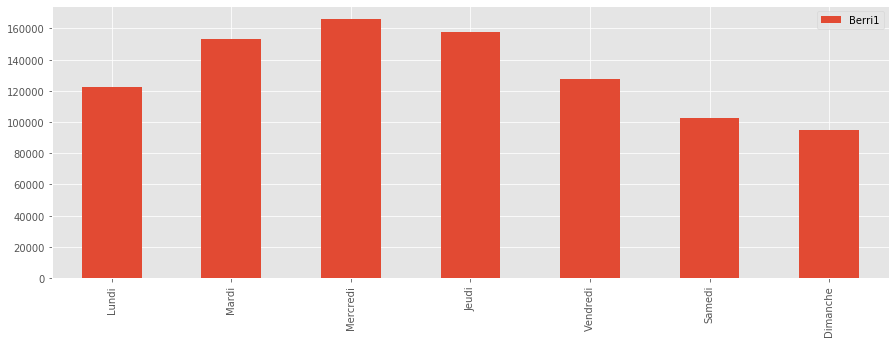

In [59]:
j_d_s_count.plot(kind='bar')

Faites moi un petit 'bar' plot() de j_d_s_count  pour bien observer ces tout ça

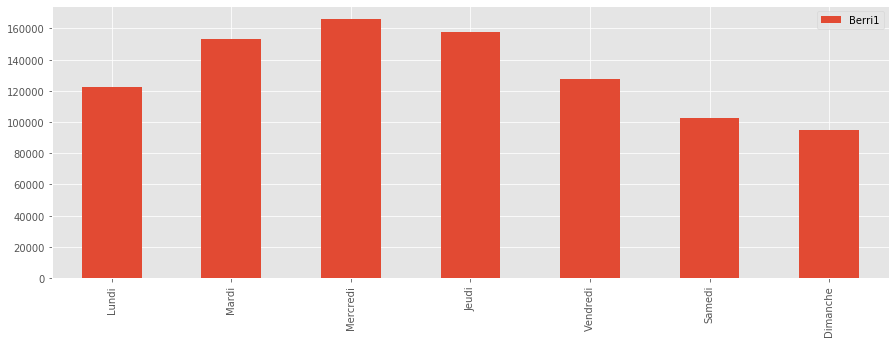

In [53]:
j_d_s_count.plot(kind='bar')

On dirait que les habitants de Montréal sont des cyclistes de banlieue - ils font beaucoup plus de vélo pendant la semaine.

### Synthese

Vous pouvez faire une petite synthese de ce debut de notebook en reprenant les lignes de codes nécessaires à la réalisation de cette visualisation.

Peut être, au lieu de prendre la somme de tous les utilisateurs de chaque jours, prenez le max d'utilisateur par jour

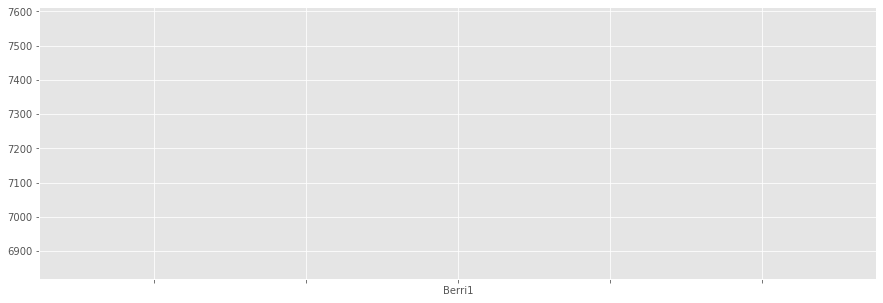

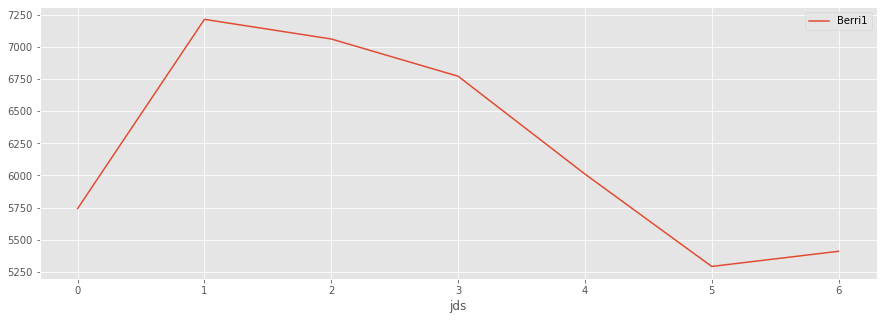

In [70]:
j_d_s_count.max().plot()
j_d_s_count=df.groupby('jds').aggregate(max)
j_d_s_count.plot()

# Un peu de météo d'amerique du Nord

À la fin de ce chapitre, toutes les données météorologiques du Canada pour 2012 seront téléchargées et sauvegardées dans un fichier CSV.

Nous le ferons en téléchargeant ces données mois par mois, pour ensuite les regrouper.


### Téléchargement d'un mois de données météorologiques 

Après s'etre amusé avec les données de cyclisme, nous pourrions prendre des données de température et de précipitations pour savoir si les gens aiment faire du vélo quand le temps est maussade. 

Nous allons donc consulter les données météorologiques historiques du Canada et comprendre comment les obtenir automatiquement.

Ici, nous allons obtenir les données pour mars 2012 et les nettoyer.

Voici un modèle d'URL que vous pouvez utiliser pour obtenir des données à Montréal.

In [67]:
# J'impose deux variables dans cette adresse : l'annee et le mois
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

In [68]:
# Pour obtenir les données de mars 2012, nous devons les formater avec month=3, year=2012.
url = url_template.format(month=3, year=2012)
weather_mar2012=pd.read_csv(url, index_col='Date/Time', parse_dates=True)

C'est Top! 

Nous pouvons utiliser la fonction read_csv et lui donner une URL en tant que nom de fichier.

Il existe plusieurs "skiprows options". Nous analysons également les dates et définissons 'Date / Time' comme colonne d'index. Voici le dataframe résultant.

In [69]:
weather_mar2012

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,00:00,-5.5,NaN,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,01:00,-5.7,NaN,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,02:00,-5.4,NaN,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,03:00,-4.7,NaN,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12.0,NaN,Snow
2012-03-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,04:00,-5.4,NaN,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14.0,NaN,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03-31 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,19:00,5.9,NaN,...,NaN,25.0,NaN,100.88,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,20:00,4.4,NaN,...,NaN,25.0,NaN,100.85,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,21:00,2.6,NaN,...,NaN,25.0,NaN,100.86,NaN,NaN,NaN,NaN,NaN,Clear


 Plottez moi la Température ! 
 
 nb: uniquement la température ou sinon plottez le pandas :)

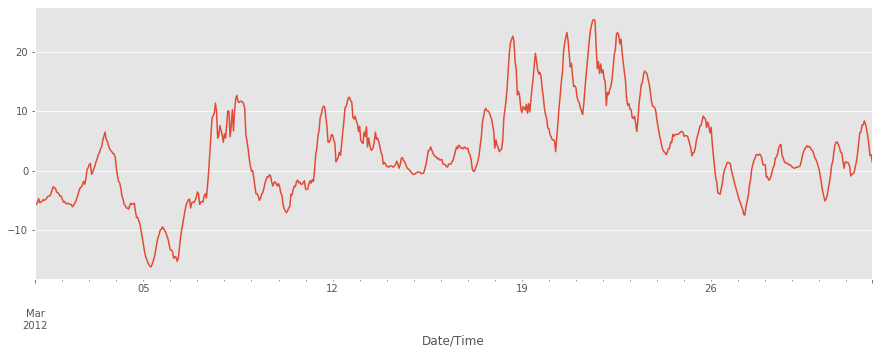

In [41]:
weather_mar2012.dropna(axis=2)

Remarquez comment dans un meme mois il peut faire fait 25 ° C et d'autre fois -15°C !

Vous remarquerez ci-dessus que quelques colonnes sont soit entièrement vides, soit ne contiennent que quelques valeurs. Débarrassons-nous de ça avec dropna.

L'argument axis=1 à dropna signifie "supprime les colonnes" (pas les lignes), et how='any'signifie" supprime la colonne si une valeur est nulle ".


,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,,,,,
2012-03-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,01:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,02:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,03:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,04:00,-5.4,-7.8,83,35,1.6,100.62,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03-31 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,19:00,5.9,-8.0,36,4,25.0,100.88,Clear
2012-03-31 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,20:00,4.4,-7.2,43,9,25.0,100.85,Clear
2012-03-31 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,21:00,2.6,-6.3,52,7,25.0,100.86,Clear


### Tracer la température par heure de la journée

Celui-ci est juste pour le plaisir - nous l'avons déjà fait auparavant, en utilisant groupby !

Mais faisons-le quand même.

A vous de jouer

<class 'pandas.core.frame.DataFrame'>


,Temp (°C)
Date/Time,
2012-03-01 00:00:00,-5.5
2012-03-01 01:00:00,-5.7
2012-03-01 02:00:00,-5.4
2012-03-01 03:00:00,-4.7
2012-03-01 04:00:00,-5.4


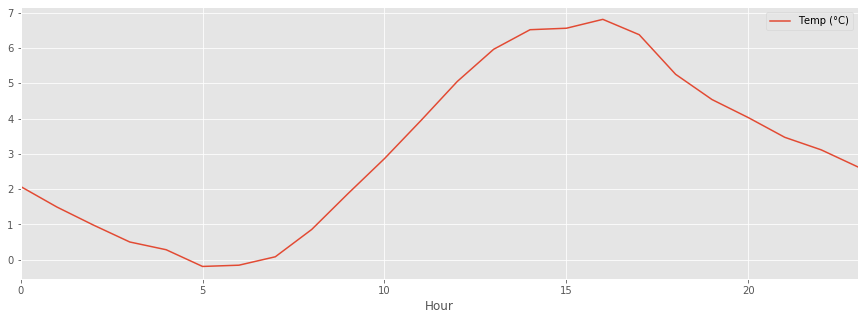

### Obtenir les données de toute l'année

Alors, si nous voulons les données pour toute l'année ? Idéalement, l'API nous permettrait simplement de télécharger ce fichier.

Premièrement, plaçons nos instructions permettant de recuperer ces informations dans une fonction qui obtient la météo pour un mois donné.

Allez y

In [71]:
def download_weather_month(years, months):
    url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"
    url = url_template.format(month=months,year=years)
    weather_data = pd.read_csv(url, index_col='Date/Time', parse_dates=True)
    weather_data = weather_data.dropna(axis=1)
    return weather_data

In [50]:
download_weather_month(2012, 1)

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,,,,,
2012-01-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,01:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,02:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,03:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,04:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-31 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,31,19:00,-7.7,-10.9,78,19,1.6,101.14,Snow
2012-01-31 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,31,20:00,-7.4,-10.7,77,20,1.6,101.09,Snow
2012-01-31 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,31,21:00,-7.1,-10.5,77,20,12.9,101.02,Cloudy


Pouvez vous creer une liste dont les élements sont les données (dataframe) meteo mensuelles de l'année 2012. La longeur de cette liste ne pourra exceder 12.

Une fois que nous avons cela, il est facile de concaténer tous les dataframes en un seul et meme datframe avec  pd.concat  
Et maintenant nous avons les données sur l'année entière!

In [ ]:
weather_2012 = pd.concat(data_by_month)
weather_2012

### Saving to a CSV

Il est lent et inutile de télécharger les données à chaque fois, alors sauvegardons notre dataframe pour une utilisation ultérieure!

In [ ]:
weather_2012.to_csv('data/weather_2017.csv')

#### Voilà c'etait votre premier scrap. Bienvenu chez les hackers qui se servent là ou ils peuvent :)

Avant de partir, vous pouvez me scrapper les données meteo de Montréal pour l'année 2018